In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df=pd.read_csv('index.csv')

In [123]:
df.shape

(1133, 6)

In [124]:
df.head(10)


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [126]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [127]:
df.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [128]:
df[['cash_type','card','coffee_name']].describe()

,cash_type,card,coffee_name
count,1133,1044,1133
unique,2,446,8
top,card,ANON-0000-0000-0012,Americano with Milk
freq,1044,88,268


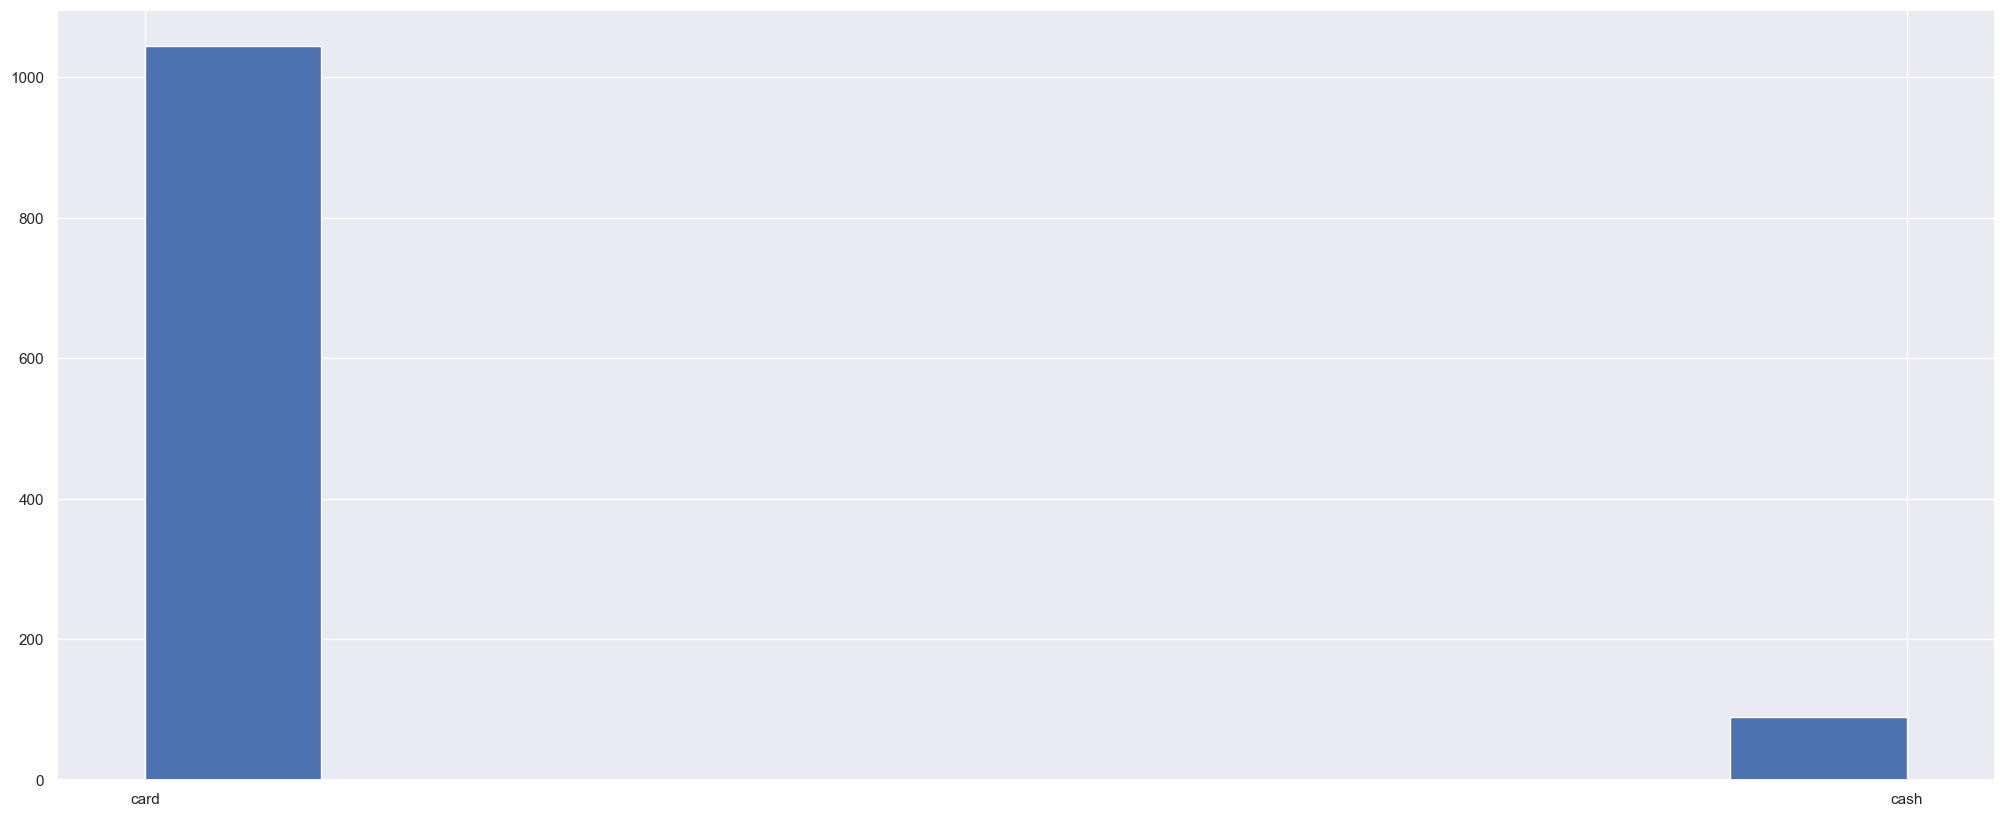

In [129]:
df['cash_type'].hist()
sns.set(rc={'figure.figsize':(4,6)})

In [130]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

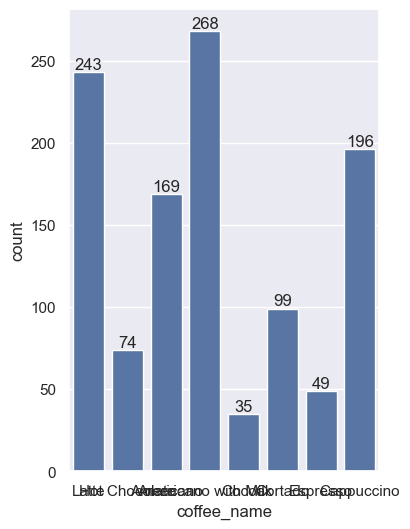

In [131]:
ax=sns.countplot(x='coffee_name',data=df)
sns.set(rc={'figure.figsize':(25,26)})
for bars in ax.containers:
    ax.bar_label(bars)

*the above bar graph show the type of coffee they sell*

In [108]:
df['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

In [109]:
pd.DataFrame(df['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)


,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [110]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [111]:
df['money'].dtype

dtype('float64')

In [112]:
df['money']=df['money'].astype('int')

In [113]:
df['money'].dtype

dtype('int64')

<Axes: xlabel='coffee_name', ylabel='money'>

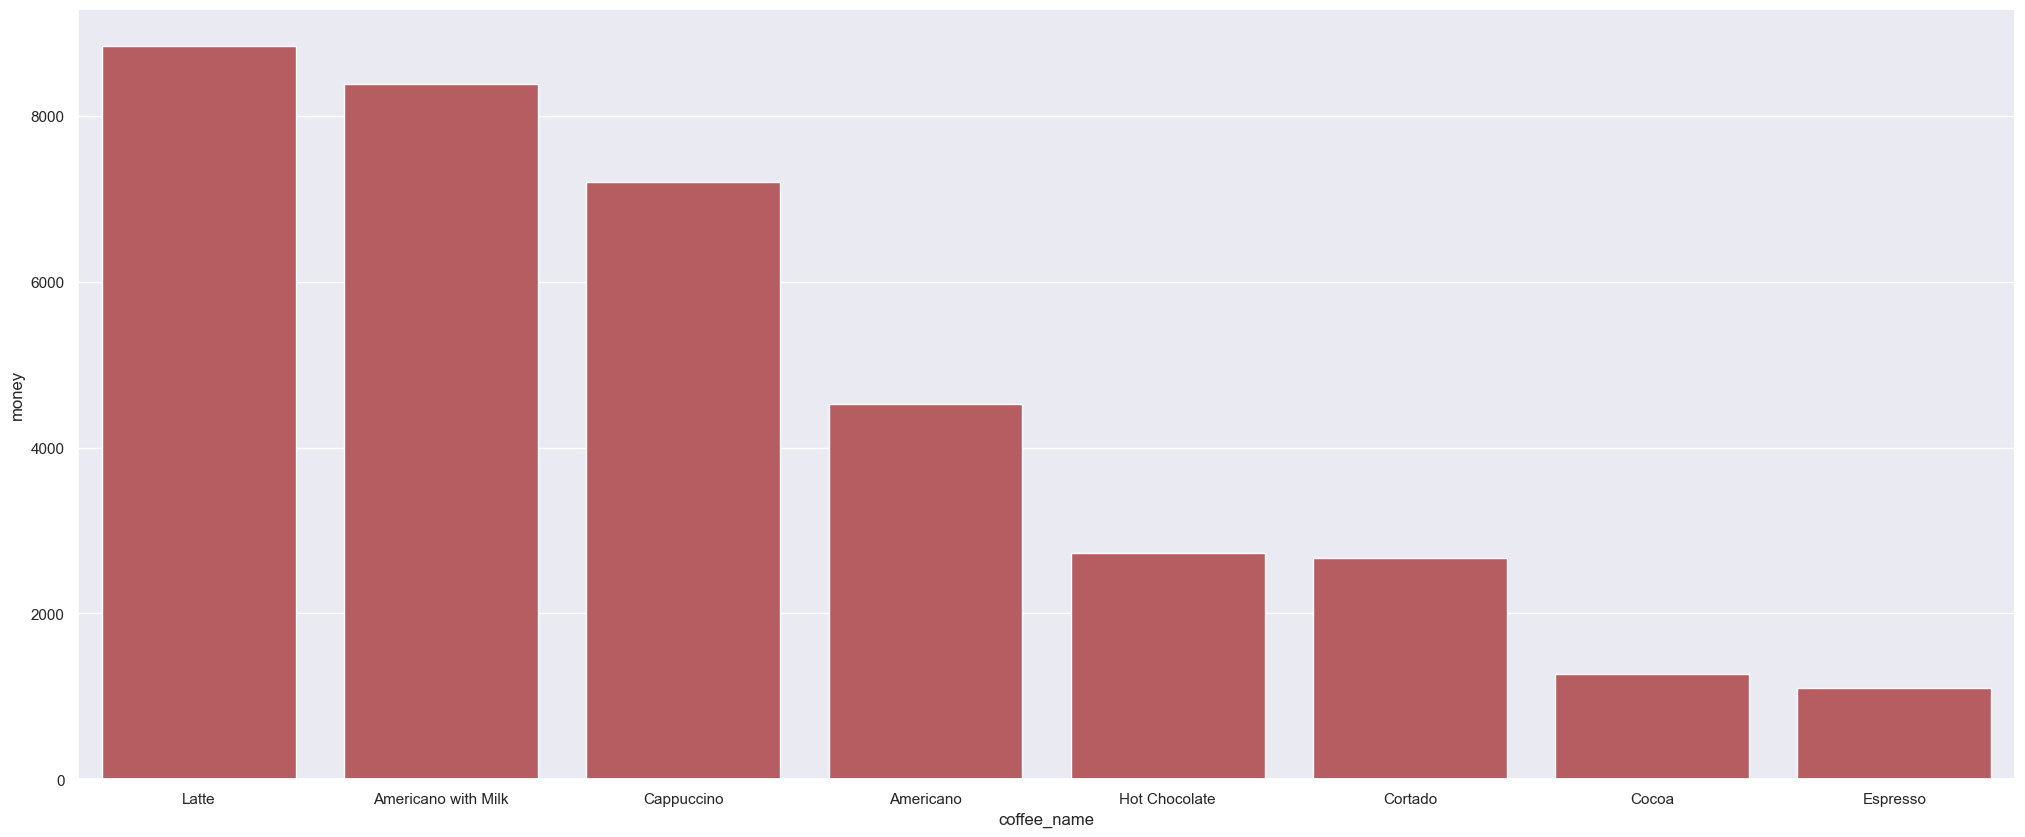

In [114]:
ax=df.groupby(['coffee_name'],as_index=False)['money'].sum().sort_values(by=['money'],ascending=False)
sns.barplot(x='coffee_name',y='money',data=ax,color='r')


In [115]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [116]:
df='#F4E37'

In [134]:
df['date']=pd.to_datetime(df['date'])
                

In [135]:
df['datetime']=pd.to_datetime(df['datetime'])#to convert into format

In [140]:
df['month']=df['date'].dt.strftime('%y-%m')#to add new column
df['day']=df['date'].dt.strftime('%week')
df['hours']=df['date'].dt.strftime('%H')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
 9   hours        1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 88.6+ KB


In [148]:
df['date'].min(),df['date'].max()# it show min and amx date

(Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00'))

In [149]:
rv=df.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=True)

Text(0.5, 0, 'Revenue')

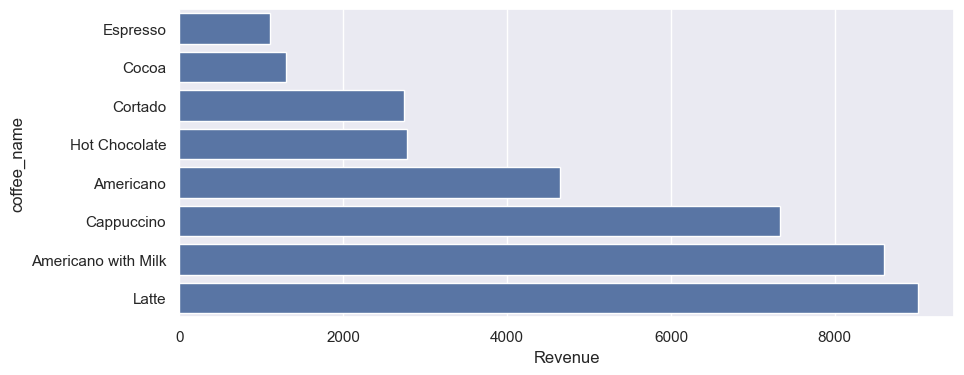

In [158]:
ax=sns.barplot(y='coffee_name',x='money',data=rv)
sns.set(rc={'figure.figsize':(10,4)})
plt.xlabel('Revenue')